## Importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.cluster import OPTICS
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster import hierarchy
from scipy.cluster.hierarchy import dendrogram
from scipy.stats import zscore
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Task 1 - The Data

## 1.1 Loading the dataset

In [46]:
penguins_df = pd.read_csv('data/penguins.csv')
penguins_df

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,39.1,18.7,181.0,3750.0,MALE
1,39.5,17.4,186.0,3800.0,FEMALE
2,40.3,18.0,195.0,3250.0,FEMALE
3,NaN,NaN,NaN,NaN,NaN
4,36.7,19.3,193.0,3450.0,FEMALE
...,...,...,...,...,...
339,NaN,NaN,NaN,NaN,NaN
340,46.8,14.3,215.0,4850.0,FEMALE
341,50.4,15.7,222.0,5750.0,MALE
342,45.2,14.8,212.0,5200.0,FEMALE


## 1.2 Explaining the dataset

* This is the penguins dataset which will be used for this clustering analysis.

* It contains 344 specimen data in rows and 4 numerical dimensions viz. culmen_length, culmen_depth, flipper_length, body_mass and 1 categorical dimension called sex.

* The first three dimensions have been measured in mm, while the body_mass dimension has been measured in grams. The sex dimensions is recorded either as MALE or FEMALE depending upon the sex of the bird it was obtained from.

* This dataset is perfect for the project pitched in Phase 1, since the relevant data for clustering is available.

* Moreover, as the dataset does not specify the pre-emptively specify the presence of any particular species of penguins, it is highly suitable for an exploratory analysis whereby clusters if formed can be analysed without bias.

* As the ultimate goal of this endeavour is to aid the GEOMAR institute in their penguin conservation efforts based on their various physical attributes.

# Task 2 - Initial Data Analysis

In [47]:
penguins_df.shape

(344, 5)

In [48]:
penguins_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   culmen_length_mm   342 non-null    float64
 1   culmen_depth_mm    342 non-null    float64
 2   flipper_length_mm  342 non-null    float64
 3   body_mass_g        342 non-null    float64
 4   sex                335 non-null    object 
dtypes: float64(4), object(1)
memory usage: 13.6+ KB


In [49]:
penguins_df.isna().sum()

culmen_length_mm     2
culmen_depth_mm      2
flipper_length_mm    2
body_mass_g          2
sex                  9
dtype: int64

* As mentioned previously the dataset has 344 rows and 5 columns.

* Since the analysis is to be conducted on the physical characteristics of penguins, the sex dimension can be droppped.

* The data has a few null values which can be dropped in order to preserve the reliability of the data and not skew it by incorporating the mean from other data points. 

# Task 3 - Preprocessing

In [50]:
penguins_df.drop('sex', axis=1, inplace=True)
penguins_df.dropna(inplace=True)
penguins_df

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
0,39.1,18.7,181.0,3750.0
1,39.5,17.4,186.0,3800.0
2,40.3,18.0,195.0,3250.0
4,36.7,19.3,193.0,3450.0
5,39.3,20.6,190.0,3650.0
...,...,...,...,...
338,47.2,13.7,214.0,4925.0
340,46.8,14.3,215.0,4850.0
341,50.4,15.7,222.0,5750.0
342,45.2,14.8,212.0,5200.0


In [51]:
penguins_df.shape

(342, 4)

In [52]:
penguins_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 342 entries, 0 to 343
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   culmen_length_mm   342 non-null    float64
 1   culmen_depth_mm    342 non-null    float64
 2   flipper_length_mm  342 non-null    float64
 3   body_mass_g        342 non-null    float64
dtypes: float64(4)
memory usage: 13.4 KB


In [53]:
penguins_df.isna().sum()

culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
dtype: int64

* The null and irrelevant data points have been dropped from the dataset.

* The dataset now contains 4 dimensions: culmen_length, culmen_depth, flipper_length measured in mm and body_mass measured in grams and 342 points of data from individual penguin specimen.

* It is now ready for further analysis.

# Task 4 - Exploratory Data Analysis: Statistical Properties

In [54]:
penguins_df.describe()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,214.014620,4201.754386
std,5.459584,1.974793,260.558057,801.954536
min,32.100000,13.100000,-132.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.750000,4750.000000
max,59.600000,21.500000,5000.000000,6300.000000


<Axes: >

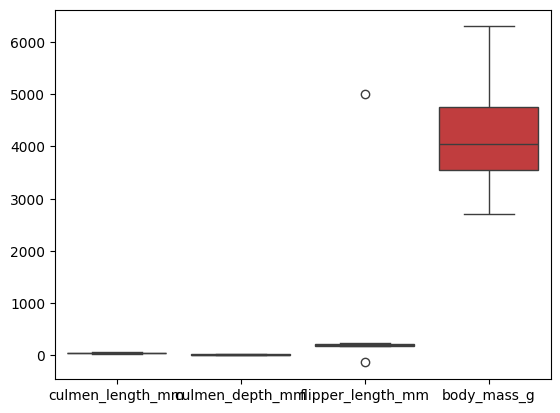

In [55]:
sns.boxplot(penguins_df)

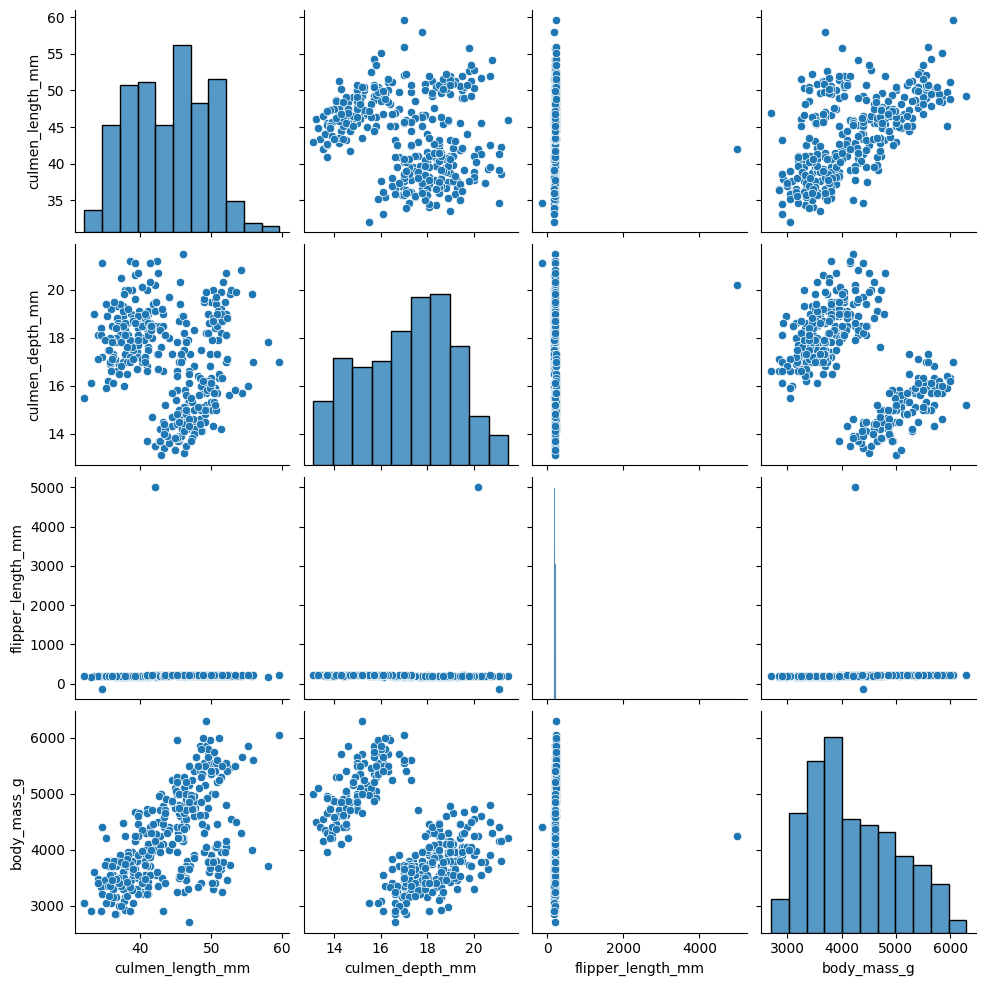

In [56]:
sns.pairplot(penguins_df)

# Task 5 - Exploratory Data Analysis: Clustering

## 5.1 k-Means

### 5.1.1 k = 2

In [57]:
kmeans_2 = KMeans(n_clusters=2, random_state=42, n_init=20, init='k-means++', max_iter=300, tol=0.0001)
clusters = kmeans_2.fit_predict(penguins_df)

#### 5.1.1.1 Culmen Length vs Body Mass

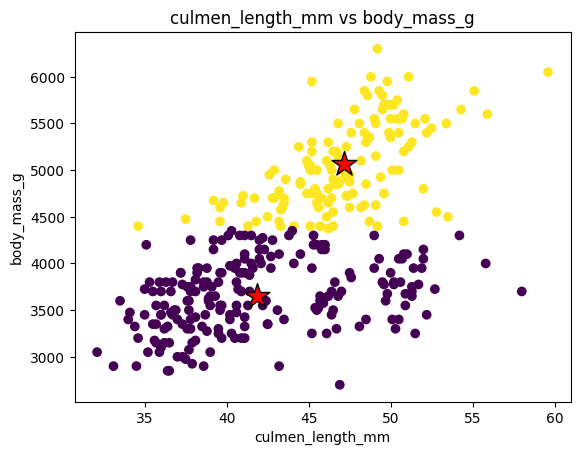

In [58]:
plt.scatter(penguins_df.culmen_length_mm, penguins_df.body_mass_g, c=clusters, cmap='viridis')

centroids = kmeans_2.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 3], marker='*', c='red', edgecolors='black', s=350)

plt.title('culmen_length_mm vs body_mass_g')
plt.xlabel('culmen_length_mm')
plt.ylabel('body_mass_g')
plt.show()

#### 5.1.1.2 Culmen Depth vs Body Mass

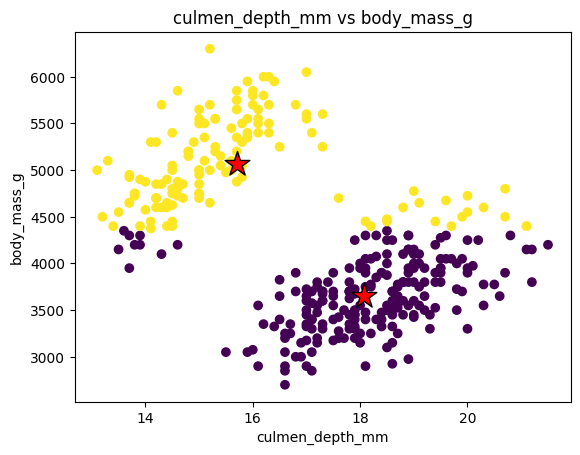

In [59]:
plt.scatter(penguins_df.culmen_depth_mm, penguins_df.body_mass_g, c=clusters, cmap='viridis')

centroids = kmeans_2.cluster_centers_
plt.scatter(centroids[:, 1], centroids[:, 3], marker='*', c='red', edgecolors='black', s=350)

plt.title('culmen_depth_mm vs body_mass_g')
plt.xlabel('culmen_depth_mm')
plt.ylabel('body_mass_g')
plt.show()

#### 5.1.1.3 Culmen Length vs Culmen Depth

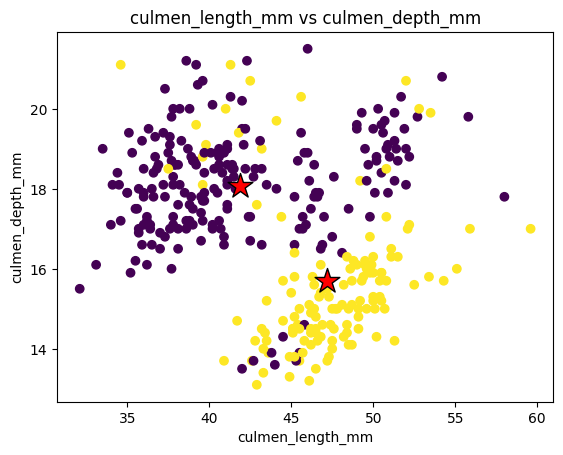

In [60]:
plt.scatter(penguins_df.culmen_length_mm, penguins_df.culmen_depth_mm, c=clusters, cmap='viridis')

centroids = kmeans_2.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], marker='*', c='red', edgecolors='black', s=350)

plt.title('culmen_length_mm vs culmen_depth_mm')
plt.xlabel('culmen_length_mm')
plt.ylabel('culmen_depth_mm')
plt.show()

### 5.1.2 k = 3

In [61]:
kmeans_3 = KMeans(n_clusters=3, random_state=42, n_init=20, init='k-means++', max_iter=300, tol=0.0001)
clusters = kmeans_3.fit_predict(penguins_df)

#### 5.1.2.1 Body Mass vs Culmen Length

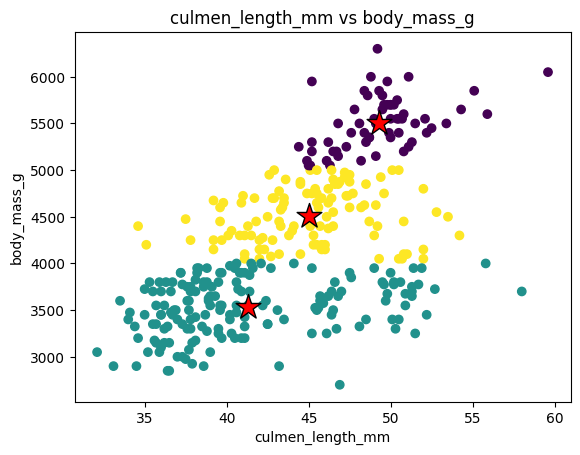

In [62]:
plt.scatter(penguins_df.culmen_length_mm, penguins_df.body_mass_g, c=clusters, cmap='viridis')

centroids = kmeans_3.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 3], marker='*', c='red', edgecolors='black', s=350)

plt.title('culmen_length_mm vs body_mass_g')
plt.xlabel('culmen_length_mm')
plt.ylabel('body_mass_g')
plt.show()

#### 5.1.2.2 Body Mass vs Culmen Depth

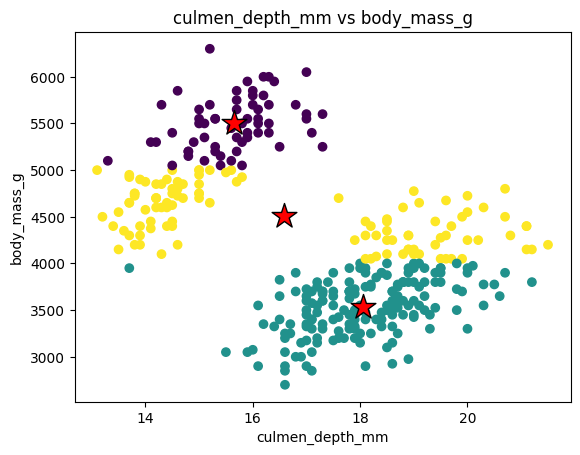

In [63]:
plt.scatter(penguins_df.culmen_depth_mm, penguins_df.body_mass_g, c=clusters, cmap='viridis')

centroids = kmeans_3.cluster_centers_
plt.scatter(centroids[:, 1], centroids[:, 3], marker='*', c='red', edgecolors='black', s=350)

plt.title('culmen_depth_mm vs body_mass_g')
plt.xlabel('culmen_depth_mm')
plt.ylabel('body_mass_g')
plt.show()

#### 5.1.2.3 Culmen Depth vs Culmen Length

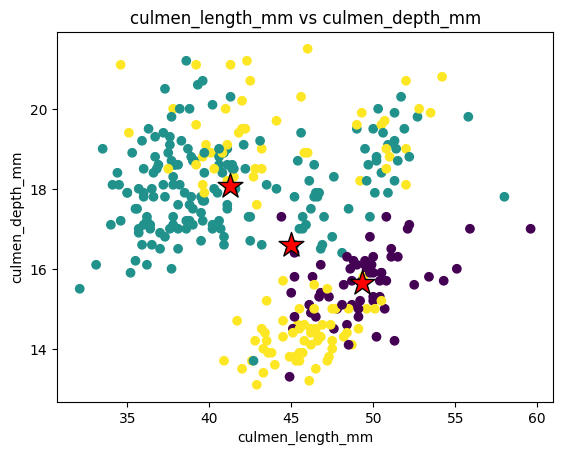

In [64]:
plt.scatter(penguins_df.culmen_length_mm, penguins_df.culmen_depth_mm, c=clusters, cmap='viridis')

centroids = kmeans_3.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], marker='*', c='red', edgecolors='black', s=350)

plt.title('culmen_length_mm vs culmen_depth_mm')
plt.xlabel('culmen_length_mm')
plt.ylabel('culmen_depth_mm')
plt.show()

### 5.1.3 Discussion

* k-Means applied on unscaled data for primary analysis yielded the following results:
    - k=2 yielded the best results in terms of cluster formation as compared to k=3

    - the best separation of clusters was shown between `body_mass_g`and `culmen_depth_mm` as compared to cluster formation amongst other dimensions in 2D.

## 5.2 DBSCAN/OPTICS

### 5.2.1 Standardize the data

In [65]:
scaler = StandardScaler()
penguins_sc = scaler.fit_transform(penguins_df)
penguins_sc = pd.DataFrame(penguins_sc, columns=penguins_df.columns)
penguins_sc.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
0,-0.884499,0.785449,-0.126893,-0.564142
1,-0.811126,0.126188,-0.107675,-0.501703
2,-0.664380,0.430462,-0.073083,-1.188532
3,-1.324737,1.089724,-0.080771,-0.938776
4,-0.847812,1.748985,-0.092301,-0.689020


In [66]:
pd.set_option('display.max_columns', None)

In [67]:
penguins_sc

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
0,-0.884499,0.785449,-0.126893,-0.564142
1,-0.811126,0.126188,-0.107675,-0.501703
2,-0.664380,0.430462,-0.073083,-1.188532
3,-1.324737,1.089724,-0.080771,-0.938776
4,-0.847812,1.748985,-0.092301,-0.689020
...,...,...,...,...
337,0.601305,-1.750171,-0.000056,0.903175
338,0.527932,-1.445897,0.003787,0.809516
339,1.188289,-0.735923,0.030692,1.933419
340,0.234440,-1.192335,-0.007743,1.246590


### 5.2.2 Run DBSCAN

In [68]:
penguins_sc.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
0,-0.884499,0.785449,-0.126893,-0.564142
1,-0.811126,0.126188,-0.107675,-0.501703
2,-0.664380,0.430462,-0.073083,-1.188532
3,-1.324737,1.089724,-0.080771,-0.938776
4,-0.847812,1.748985,-0.092301,-0.689020


In [69]:
dbscan = DBSCAN(eps=1, min_samples=10, metric='euclidean', metric_params=None, algorithm='auto', leaf_size=30, p=None, n_jobs=3)
dbscan_clusters = dbscan.fit_predict(penguins_sc)
print(np.unique(dbscan_clusters))

[-1  0  1]


In [70]:
labels = dbscan.labels_
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)

#### 5.2.2.1 Body Mass vs Culmen Length

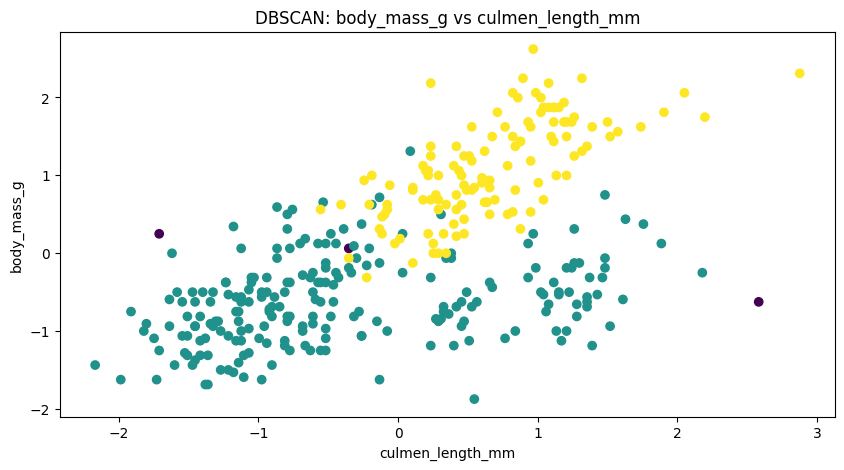

In [71]:
plt.figure(figsize=(10, 5))

plt.scatter(penguins_sc.culmen_length_mm, penguins_sc.body_mass_g, c=labels, cmap='viridis')

plt.title('DBSCAN: body_mass_g vs culmen_length_mm')
plt.xlabel('culmen_length_mm')
plt.ylabel('body_mass_g')
plt.show()

#### 5.2.2.2 Body Mass vs Culmen Depth

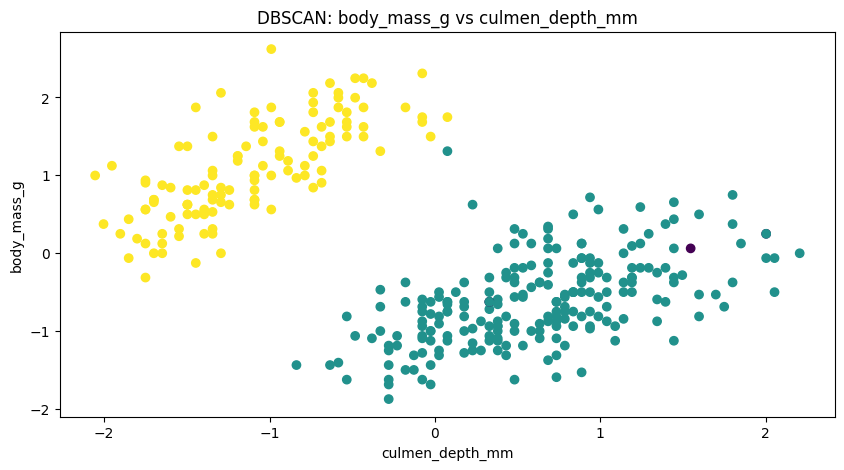

In [72]:
plt.figure(figsize=(10, 5))

plt.scatter(penguins_sc.culmen_depth_mm, penguins_sc.body_mass_g, c=dbscan_clusters, cmap='viridis')

plt.title('DBSCAN: body_mass_g vs culmen_depth_mm')
plt.xlabel('culmen_depth_mm')
plt.ylabel('body_mass_g')
plt.show()

#### 5.2.2.3 Culmen Length vs Culmen Depth

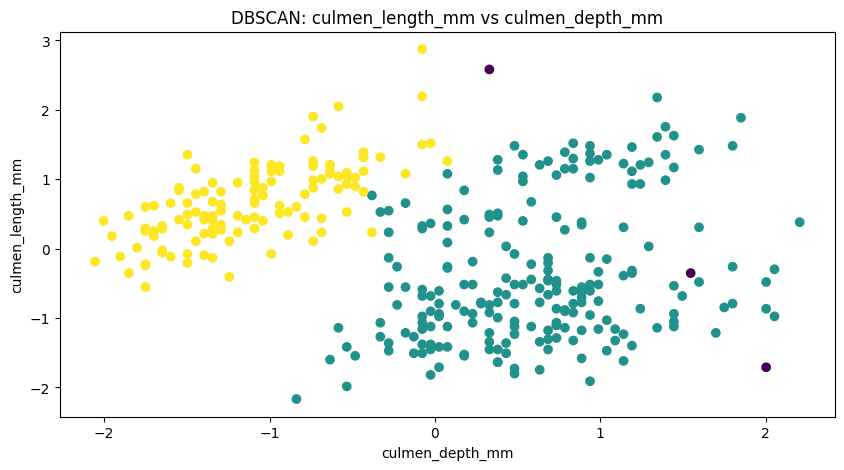

In [73]:
plt.figure(figsize=(10, 5))

plt.scatter(penguins_sc.culmen_depth_mm, penguins_sc.culmen_length_mm, c=dbscan_clusters, cmap='viridis')

plt.title('DBSCAN: culmen_length_mm vs culmen_depth_mm')
plt.xlabel('culmen_depth_mm')
plt.ylabel('culmen_length_mm')
plt.show()

### 5.2.3 Run OPTICS

In [74]:
optics = OPTICS(min_samples=5, xi=0.05, min_cluster_size=0.1)
optics.fit(penguins_sc)

clusters = optics.labels_

#### 5.2.3.1 Culmen Length vs Body Mass

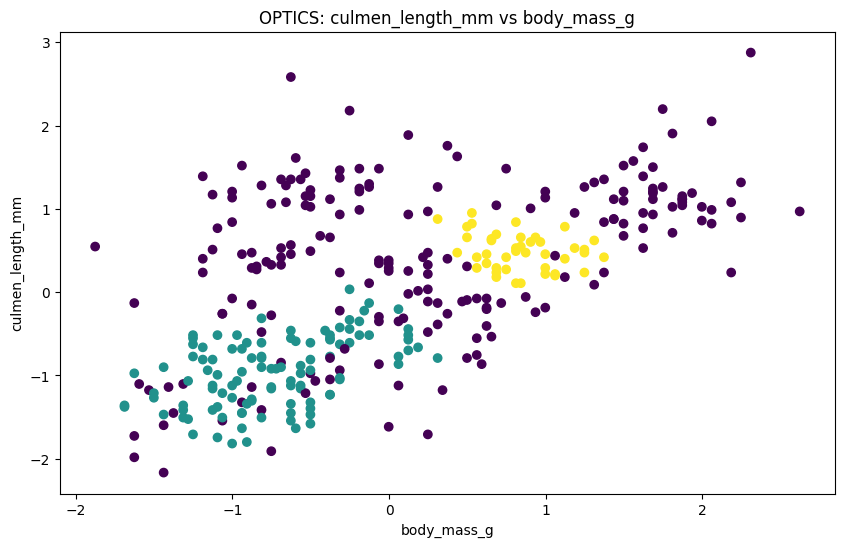

In [75]:
plt.figure(figsize=(10, 6))
plt.scatter(penguins_sc.body_mass_g, penguins_sc.culmen_length_mm, c=clusters, cmap='viridis')
plt.xlabel('body_mass_g')
plt.ylabel('culmen_length_mm')
plt.title('OPTICS: culmen_length_mm vs body_mass_g')
plt.show()

#### 5.2.3.2 Body Mass vs Culmen Depth

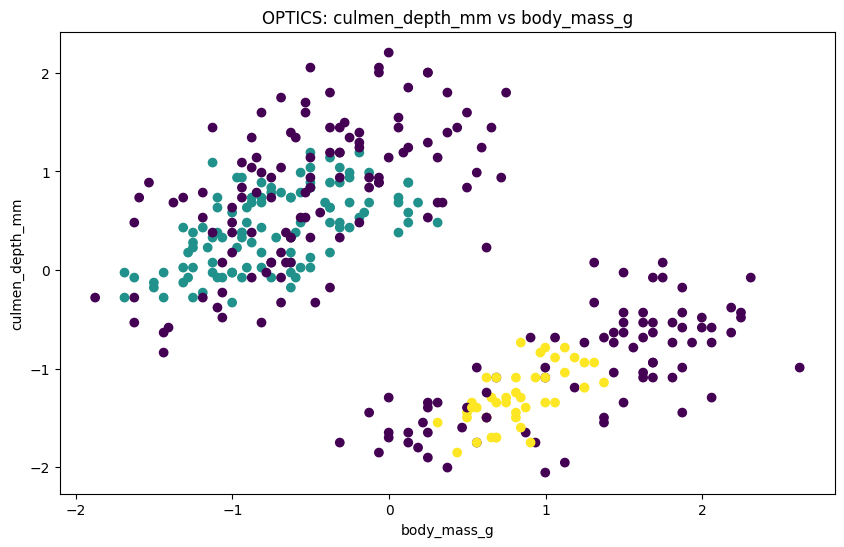

In [76]:
plt.figure(figsize=(10, 6))
plt.scatter(penguins_sc.body_mass_g, penguins_sc.culmen_depth_mm, c=clusters, cmap='viridis')
plt.xlabel('body_mass_g')
plt.ylabel('culmen_depth_mm')
plt.title('OPTICS: culmen_depth_mm vs body_mass_g')
plt.show()

#### 5.2.3.3 Culmen Length vs Culmen Depth

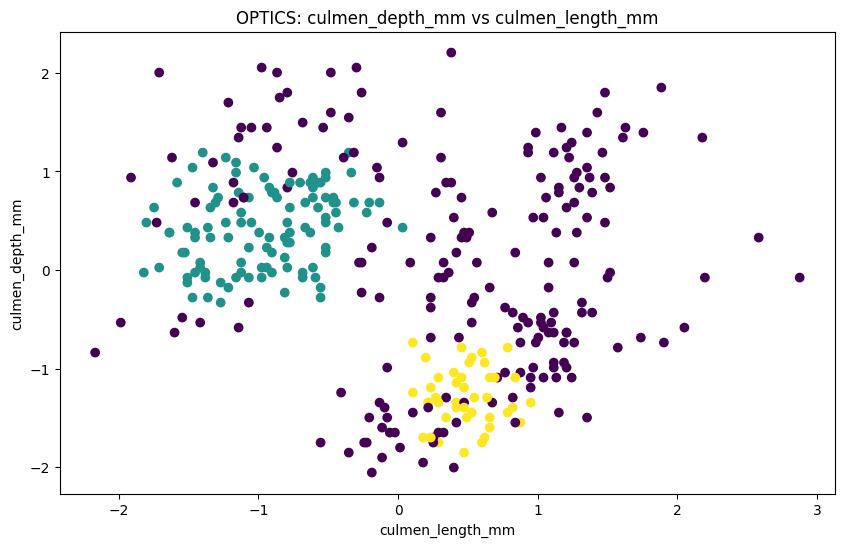

In [77]:
plt.figure(figsize=(10, 6))
plt.scatter(penguins_sc.culmen_length_mm, penguins_sc.culmen_depth_mm, c=clusters, cmap='viridis')
plt.xlabel('culmen_length_mm')
plt.ylabel('culmen_depth_mm')
plt.title('OPTICS: culmen_depth_mm vs culmen_length_mm')
plt.show()

## 5.3 HAC

### 5.3.1 Fitting the HAC Model

In [78]:
hac = AgglomerativeClustering(n_clusters=2, metric='euclidean', linkage='ward', compute_distances=True)
hac.fit_predict(penguins_sc)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [79]:
def create_linkage(hac):
    n_samples = len(hac.labels_)
    counts = np.zeros(hac.children_.shape[0])

    for i, merge in enumerate(hac.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([hac.children_, hac.distances_,counts]).astype(float)
    return linkage_matrix

matrix=create_linkage(hac)

### 5.3.2 Visualize Dendrogram

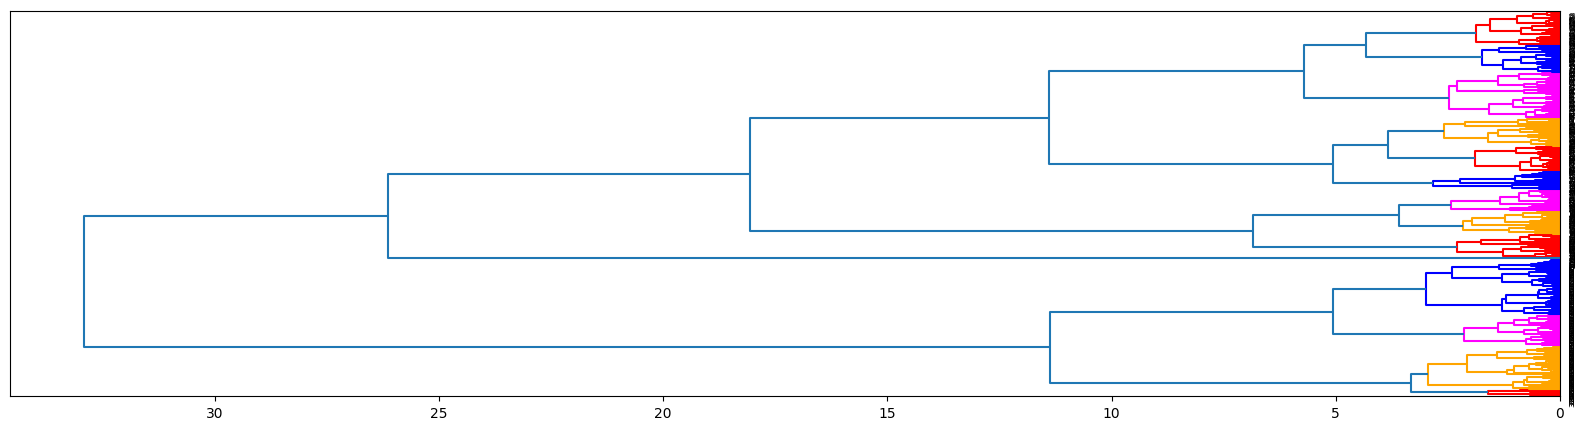

In [81]:
hierarchy.set_link_color_palette(['red','orange','magenta','blue'])
plt.figure(figsize=(20, 5))
dendrogram(
    matrix,
    color_threshold=3, 
    orientation='left',
    labels=penguins_sc.index,
    leaf_rotation=90
    )
plt.show()

# Task 6 - Dimensionality Reduction

## 6.1 Applying PCA on standardized data

In [82]:
pca = PCA(n_components=2)
penguins_pca = pca.fit_transform(penguins_sc)
penguins_pca = pd.DataFrame(penguins_pca, index=penguins_sc.index)

In [83]:
penguins_pca.cov().round(2)

,0,1
0,1.89,0.00
1,0.00,1.02


## 6.2 Analyzing explained variance

In [84]:
exp_var =  pca.explained_variance_ratio_
exp_var

array([0.47114808, 0.25339237])

## 6.3 Dealing with outliers

In [85]:
# identifying outliers

z_scores = zscore(penguins_pca)
outlier = np.where(np.abs(z_scores) > 3)[0]

# filtering outliers

mask = np.ones(len(penguins_pca), dtype=bool)
mask[outlier] = False
penguins_pca_filt = penguins_pca[mask]

## 6.4 Visualizing the PCA result

/var/folders/j4/zzbyrmh10250nzjc681c0_x40000gn/T/ipykernel_39734/1148396493.py:2: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(penguins_pca_filt.iloc[:,0], penguins_pca_filt.iloc[:,1], cmap='viridis')


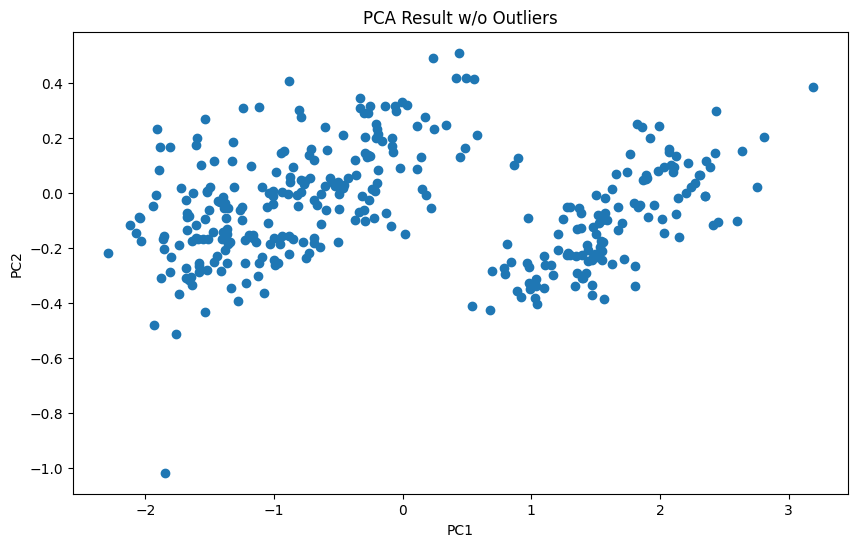

In [86]:
plt.figure(figsize=(10, 6))
plt.scatter(penguins_pca_filt.iloc[:,0], penguins_pca_filt.iloc[:,1], cmap='viridis')
plt.title('PCA Result w/o Outliers')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

# Task 7 - Conclusions and Future Work

## 7.1 For k-means from task 5

### 7.1.1 for k=2

In [87]:
kmeans_2 = KMeans(n_clusters=2, random_state=42, n_init=20, init='k-means++', max_iter=300, tol=0.0001)
clusters_k2 = kmeans_2.fit_predict(penguins_df)

peng_df_copy = penguins_df.copy()
peng_df_copy['clusters_k2'] = clusters_k2

clusters_k2_mean = peng_df_copy.groupby('clusters_k2').mean()
clusters_k2_mean

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
clusters_k2,,,,
0,41.847368,18.074641,215.100478,3655.023923
1,47.181955,15.700000,212.308271,5060.902256


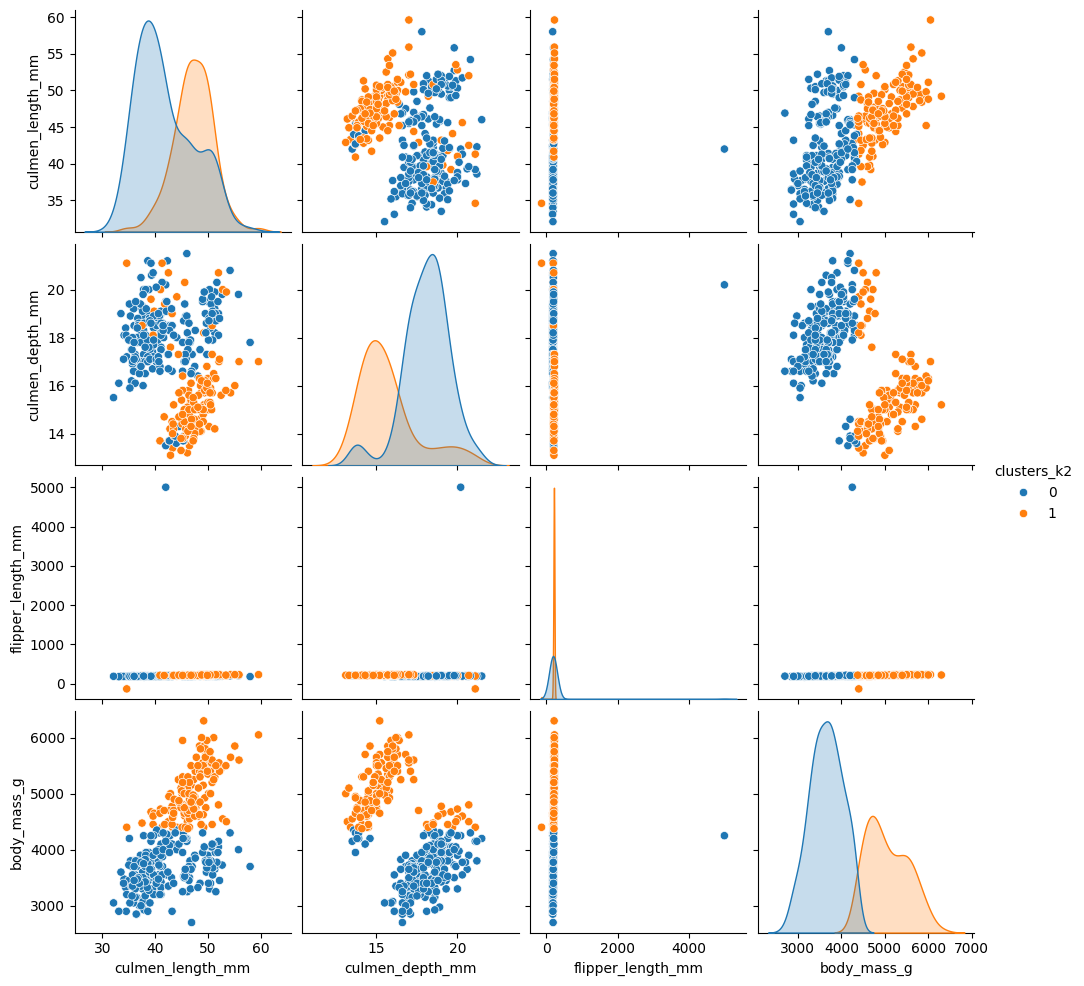

In [88]:
sns.pairplot(peng_df_copy, hue='clusters_k2')

#### 7.1.1.1 Explanation of results

* for k=2 the algorithm has identified 2 clusters mainly based on the weight of the penguins.

* the table above clearly shows the differences in the mean of physical attributes of the penguins in the two clusters.

* clear cluster formation is visible when one of features is `body_mass_g` which should also be considered for further work.

* as can be seen from the boxplot for `body_mass_g` vs `culmen_depth_mm` the culmen depth for one with high body mass the culmen depth is relatively smaller then the other cluster with lower body mass.

### 7.1.2 for k=3

In [89]:
kmeans_3 = KMeans(n_clusters=3, random_state=42, n_init=20, init='k-means++', max_iter=300, tol=0.0001)
clusters_k3 = kmeans_3.fit_predict(penguins_df)

peng_df_copy = penguins_df.copy()
peng_df_copy['clusters_k3'] = clusters_k3

clusters_k3_mean = peng_df_copy.groupby('clusters_k3').mean()
clusters_k3_mean

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
clusters_k3,,,,
0,49.306557,15.649180,221.065574,5501.639344
1,41.284706,18.057647,190.317647,3532.352941
2,45.001802,16.588288,246.432432,4512.612613


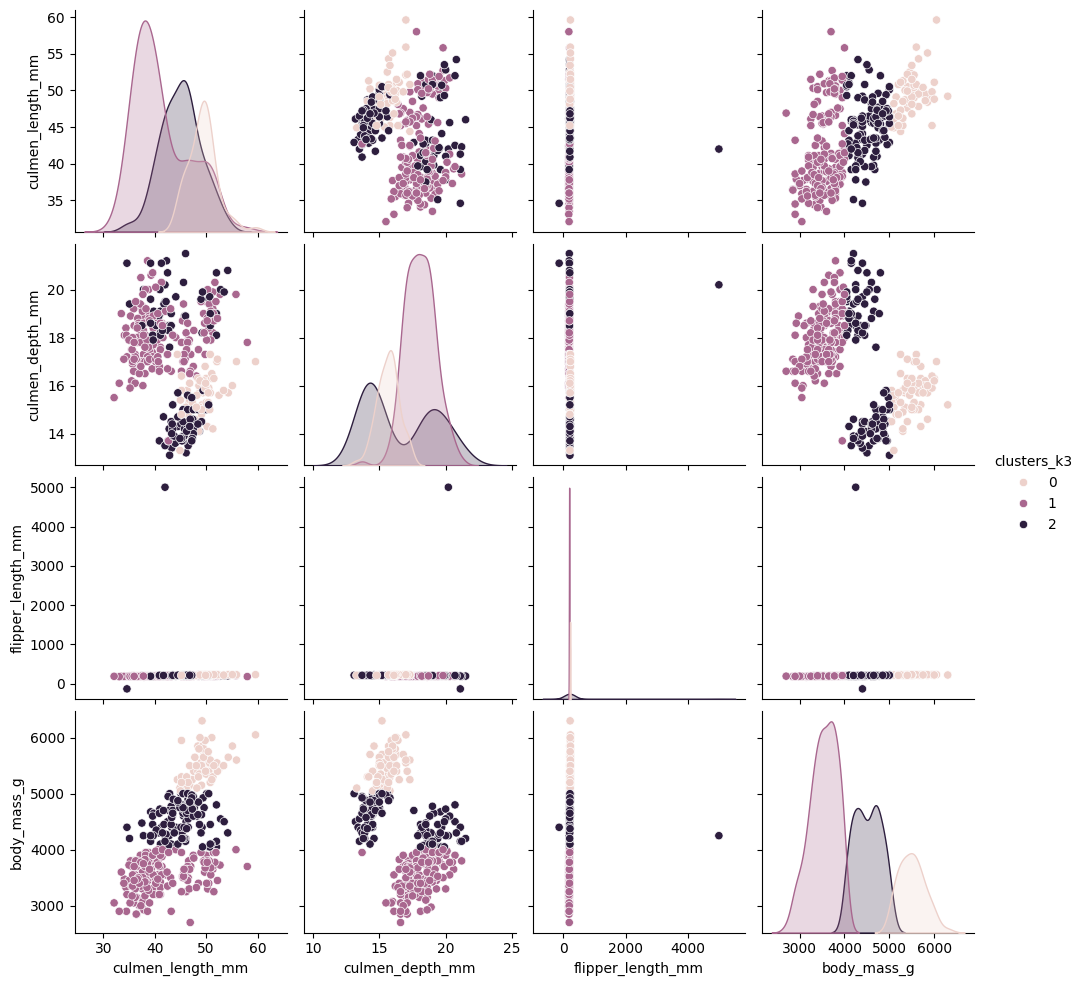

In [45]:
sns.pairplot(peng_df_copy, hue='clusters_k3')

#### 7.1.2.1 Explanation of results

* for k=3 the algorithm has identified 3 clusters again mainly based on the weight of the penguins.

* the table above clearly shows the differences in the mean of physical attributes of the penguins in the three clusters.

## 7.2 Summary of the achieved results

* the algorithm predicted 2 or 3 clusters based on the 'k' value assigned.

* these clusters were mainly based on the weight of the penguins, although the means of their physical characteristics also support this division as a clear variation can be seen.

* this division on the basis of weight could be because of the algoritm being run on unstandardised data which need to be kept in mind in the future.

* nevertheless, the clusters have been successful in pointing out the lack homogeneity amongst the penguins.

## 7.3 Results vs expected outcome

* the original motive behind undertaking this task was to find the existence of distinct clusters penguins based on their physical characteristics, which might possibly be due to them belonging to distinct species.

* the results clearly show us the formation of atleast two distinct clusters based on the physical characteristics of penguins and thus have achiebed the expected result.

## 7.4 How do the results help the organization specifically?

* as mentioned earlier, the original aim was to find clusters of penguins, if they existed, based on their physical characteristics.

* the results from task 5 clearly show us the presence of atleast 2 distinct clusters of penguins based on their physical attributes.

* moreover, the results from task 6 also show the formation of two distinct clusters.

* from the purview of GEOMAR, this insight is greatly helpful in the organization's conservation efforts, as now we know that at least two varieties of penguins exists at the place from where the dataset taken and GEOMAR can now tailor its work as per requirements of these clusters individually.

## 7.5 Recommendations

* the research has provided the organization with valueable insights by revealing distinct groups amongst the penguin population based on their physical characteristics.

* GEOMAR can now form targeted strategies for their conservation efforts to ensure the required attention is given to the vulnerable group of the penguin population.

* additionally, this also bolsters further research efforts of the organisation, whereby the organization can focus on the factors that contribute to the variations of the penguin species, e.g.: ecological factors, loss of habitat, presence of predators or other invasive species etc.

* another recommendation would be to partner up with other similar local, non-local and international organisations to leverage their resources and expertise in the subject matter.

* GEOMAR should continue with such data-driven research which aids with their decision-making processes.

## 7.6 Limitations

* the algorithm utilised during this research was run on a non-standardised dataset which might affect the results.

* although the original expected outcome mentioned cluster formation on the basis of species, the relevant information was not available in the dataset, thus calling for further refinement.

* the dataset is focused solely on a limited no. of physical traits, disregarding many other physical and non-physical attributes viz. height, migration patterns, food habits etc.

* the size of the dataset is rather small thus limiting the scope of the findings.


## 7.7 Ideas for future work

* try running k-means on the standardised dataset.

* incorporate non-physical chracteristics such as habitat conditions, availability of food, temperature conditions etc.

* incorporate geographical data to track penguin movements.

## 7.8 Critical discussion

* The dataset was not standardised while running k-Means, which is important to ensure that all features contributed equally to the distance calculations.

* Although, k-Means was selected due to its efficiency and straightforward implementation, it assumes spherical clusters, whereas DBSCAN would give better results by accounting varying densities.

* Silhouette visualizer should have been implemented to find the optimal number of clusters instead of just assuming the number of clusters.

* Since the focus is on physical attributes of the penguins, more physical attributes could have been helpful viz. height, skeletal structure etc.

## 7.9 Critical reflection

* the original task was to find clusters based on physical characteristics of the penguins and possibly find the underlying species distribution.

* the research was successfully able to find clusters based on the physical characteristics.

* however no data on the species distribution was available, thus it might have been premature to include the species aspect of the birds due to the lack of data.

* the dataset was small in size, a better database could have been found which might have given better results.